Per questo notebook, che ha lo scopo di fornire una panoramica su alcuni strumenti legati all'analisi di reti e di fenomeni di diffusione dell'informazione su di esse, utilizzeremo un piccolo dataset famoso nella Network Science: [Zachary's Karate Club](http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm).  
La costruzione di questo dataset è legato a una storia interessante e rappresenta uno delle prime applicazioni degli algoritmi di Community Detection, lascio quindi ai più curiosi un riferimento per [approfondire](https://en.wikipedia.org/wiki/Zachary%27s_karate_club).

# Introduzione

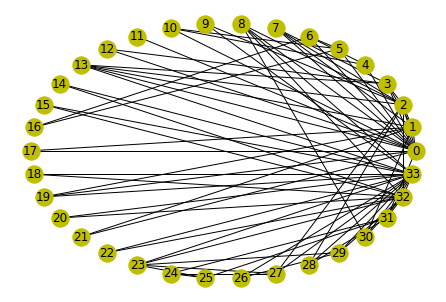

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
nx.draw_circular(G, with_labels=True,node_color='y')
plt.show()

I nodi possono avere informazione (attributi)

In [2]:
G.nodes[0]

{'club': 'Mr. Hi'}

Posso aggiungere attributi, modificarne i valori, ...

In [3]:
G.nodes[0]['status'] = 'infected'

E colorare in base ad essi la rete

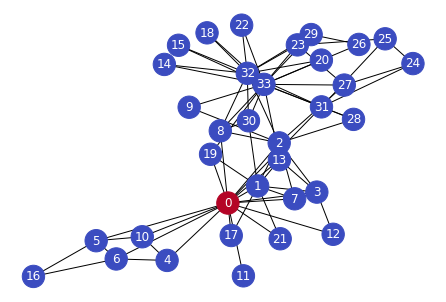

In [4]:
values = [1 if e=='infected' else 0. for e in \
          [G.nodes[i].get('status','susceptible') for i in range(0,len(G.nodes))]]

nx.draw(G, cmap=plt.cm.coolwarm, node_color=values, with_labels=True, font_color='white',node_size=500)
plt.show()

In [5]:
del(G.nodes[0]['status'])

Visualizziamo con una mappa di calore un indice di centralità della rete

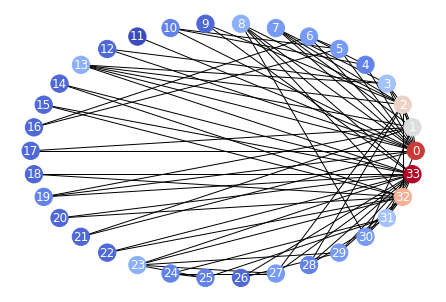

In [6]:
deg_centrality_values = list(nx.degree_centrality(G).values())

nx.draw_circular(G, with_labels=True, node_color=deg_centrality_values, cmap=plt.cm.coolwarm,font_color='white')
plt.show()

# Spatial Spreading

- Generiamo uniformemente a caso delle torrette telefoniche in uno spazio a due dimensioni.
- Generiamo estrando da una distribuzione uniforme il numero di cellulari infetti in una cella
- Costruiamo la tesselazione Voronoi
- Normalizziamo i valori degli infetti e stampiamo il diagramma di Voronoi colorandolo con una mappa di calore

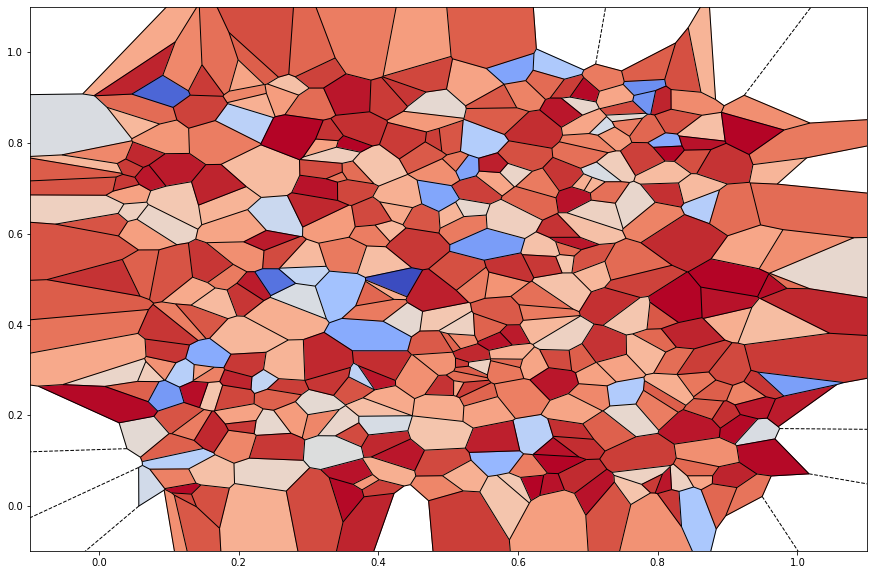

In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# generate data points (towers) /infected values

numtower = 400
dimension = 2

celltowers = np.random.uniform(size=[numtower, dimension])
infected_in_cell = np.random.power(5.,size=numtower)

# generate Voronoi tessellation
vor = Voronoi(celltowers)

# find min/max values for normalization
minima = min(infected_in_cell)
maxima = max(infected_in_cell)

# normalize chosen colormap
norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.coolwarm)

# plot Voronoi diagram, and fill finite regions with color mapped from speed value
fig = plt.figure(figsize=(15,10))
ax = plt.axes()
voronoi_plot_2d(vor, show_points=False, show_vertices=False, s=1,ax=ax)
for r in range(len(vor.point_region)):
    region = vor.regions[vor.point_region[r]]
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=mapper.to_rgba(infected_in_cell[r]))
plt.show()